# SynSignal and SynSpec
Synthetic Spectra and Signals are covered here. The classes ``SynSignal`` can apply shotnoise in a pseudo-random way and the class ``SynSpec`` can add different ``SynSignal``s with another pseudo-random constant noise.

In [1]:
%matplotlib inline

# Load the functions and classes we need.
from pymsastro.spectrum import SynSignal, SynSpectrum

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 5.0)

## SynSignal
Suppose we have a constant synthetic signal of a black-body and 10 measured values:

In [2]:
elements = 100

from astropy import units as u
from astropy.analytic_functions import blackbody_lambda, blackbody_nu
wavelengths = np.linspace(3000, 20000, elements) * u.AA
temperature = 6000 * u.K
flux_lam = blackbody_lambda(wavelengths, temperature).value
flux_lam /= np.max(flux_lam)

signal = SynSignal(flux_lam * 100)

C:\Programming\Anaconda\lib\site-packages\astropy\analytic_functions\blackbody.py:30: RuntimeWarning: overflow encountered in expm1
  _has_buggy_expm1 = np.isnan(np.expm1(1000))


I have normalized the blackbody signal in a way that the maximum value is 100. Let's see what the theoretical spectrum looks like:

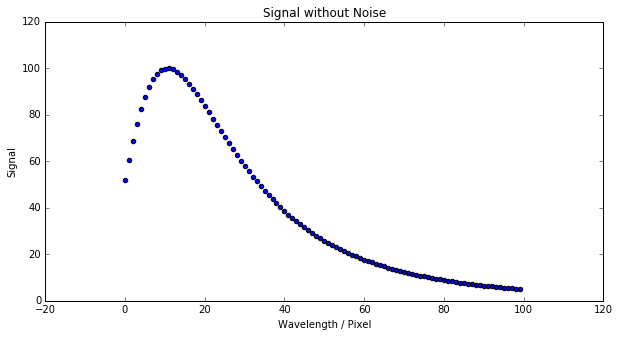

In [3]:
plt.scatter(np.arange(elements), signal.signal)
plt.title('Signal without Noise')
plt.ylabel('Signal')
plt.xlabel('Wavelength / Pixel')
plt.show()

Now we have created a signal with shotnoise too, this will deviate a bit from the original spectrum:

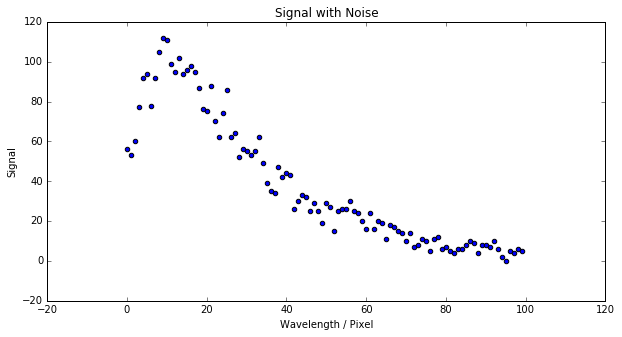

In [4]:
plt.scatter(np.arange(elements), signal.signal_with_noise)
plt.title('Signal with Noise')
plt.ylabel('Signal')
plt.xlabel('Wavelength / Pixel')
plt.show()

The ``SynSignal`` also computes the standard deviation of the noise so we are able to show the 1 sigma and 3 sigma deviation region:

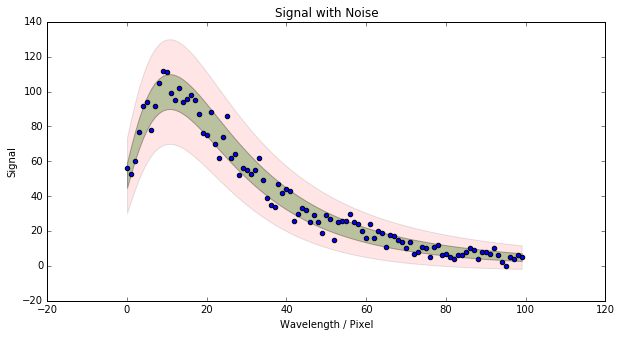

In [5]:
plt.fill_between(np.arange(elements), signal.signal-signal.noise, signal.signal+signal.noise, facecolor='green', alpha=0.3)
plt.fill_between(np.arange(elements), signal.signal-3*signal.noise, signal.signal+3*signal.noise, facecolor='red', alpha=0.1)
plt.scatter(np.arange(elements), signal.signal_with_noise)
plt.title('Signal with Noise')
plt.ylabel('Signal')
plt.xlabel('Wavelength / Pixel')
plt.show()

This resembles a very moderate Signal-to-Noise signal:

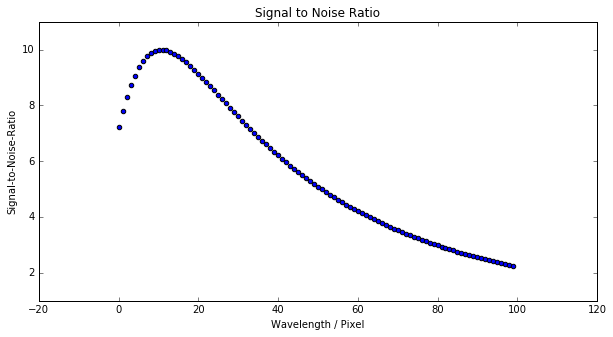

In [6]:
plt.scatter(np.arange(elements), signal.signal / signal.noise)
plt.title('Signal to Noise Ratio')
plt.ylabel('Signal-to-Noise-Ratio')
plt.xlabel('Wavelength / Pixel')
plt.show()

Just as reference I'll show now a high SNR blackbody signal as well:

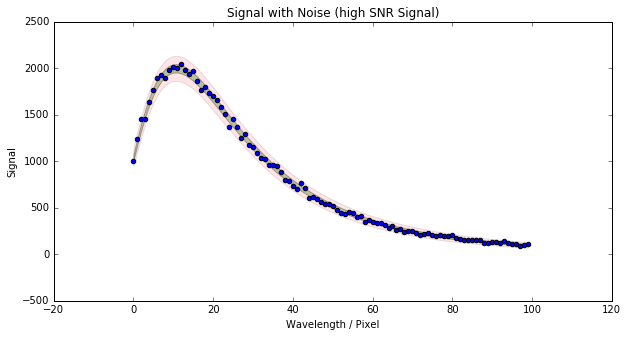

In [7]:
signal = SynSignal(flux_lam * 2000)
plt.fill_between(np.arange(elements), signal.signal-signal.noise, signal.signal+signal.noise, facecolor='green', alpha=0.3)
plt.fill_between(np.arange(elements), signal.signal-3*signal.noise, signal.signal+3*signal.noise, facecolor='red', alpha=0.1)
plt.scatter(np.arange(elements), signal.signal_with_noise)
plt.title('Signal with Noise (high SNR Signal)')
plt.ylabel('Signal')
plt.xlabel('Wavelength / Pixel')
plt.show()

and a low SNR spectrum

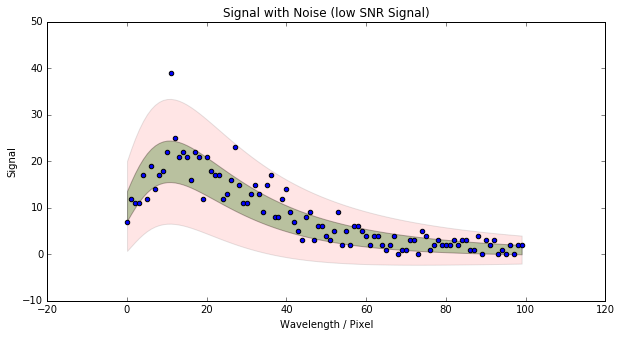

In [8]:
signal = SynSignal(flux_lam * 20)
plt.fill_between(np.arange(elements), signal.signal-signal.noise, signal.signal+signal.noise, facecolor='green', alpha=0.3)
plt.fill_between(np.arange(elements), signal.signal-3*signal.noise, signal.signal+3*signal.noise, facecolor='red', alpha=0.1)
plt.scatter(np.arange(elements), signal.signal_with_noise)
plt.title('Signal with Noise (low SNR Signal)')
plt.ylabel('Signal')
plt.xlabel('Wavelength / Pixel')
plt.show()

## Important Note

The ``SynSignal`` class should not be modified since all attributes are only calculated once, so changing any values after creating the instance may make the attributes senseless. Always create a new instance for a new signal.

Even the shotnoise is only applied once so the signal with noise is always the same for the same instance.

# SynSpectrum

Mostly a spectrum consists not only of a signal with shotnoise but also of some constant noise (like readout-noise). The ``SynSpectrum`` class can provide it.

Also the ``SynSpectrum`` has a custom ``plot`` method that allows for pretty pictures without invoking matplotlib by yourself.

Let's try the first signal again with a constant noise of standard deviation 5.

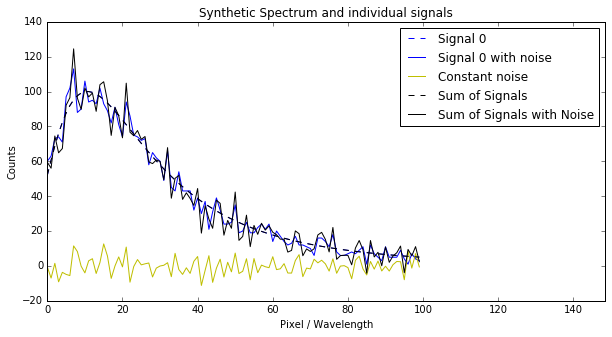

In [9]:
signals = [flux_lam * 100]
spec = SynSpectrum(signals, constnoise=5)
spec.plot()

The sums of the signal and the noise can be accessed by the attributes ``signalsum_with_noise`` and ``noisequadsum``:

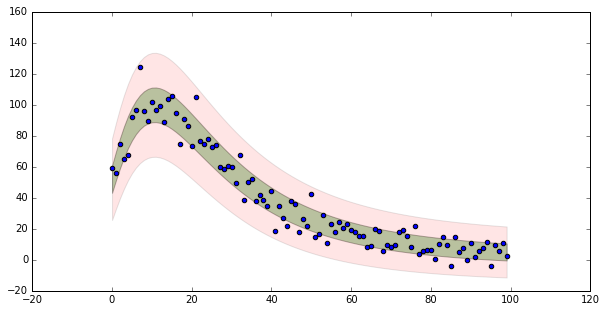

In [10]:
signalsum = spec.signalsum
noisesum = spec.noisequadsum
plt.fill_between(np.arange(elements), signalsum-noisesum, signalsum+noisesum, facecolor='green', alpha=0.3)
plt.fill_between(np.arange(elements), signalsum-3*noisesum, signalsum+3*noisesum, facecolor='red', alpha=0.1)
plt.scatter(np.arange(elements), spec.signalsum_with_noise)
plt.show()

It's also possible to add several different signals to a spectrum. Suppose we have a blackbody spectrum and a constant signal.

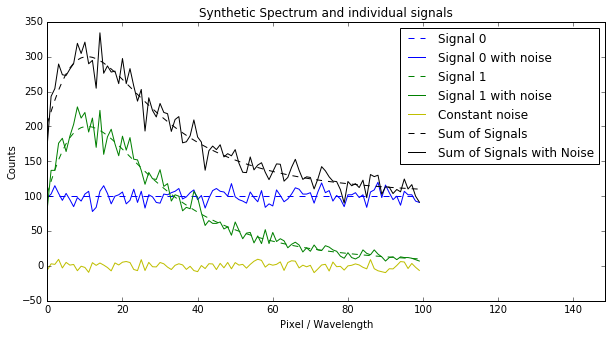

In [11]:
signals = []

# Add signals to spectrum
signals.append(np.ones(elements)*100) # Constant signal
signals.append(flux_lam*200)          # Blackbody signal

# Make spectrum and plot
spectrum = SynSpectrum(signals, wavelengths=None, shotnoise=True, constnoise=5)
spectrum.plot()

# Examples

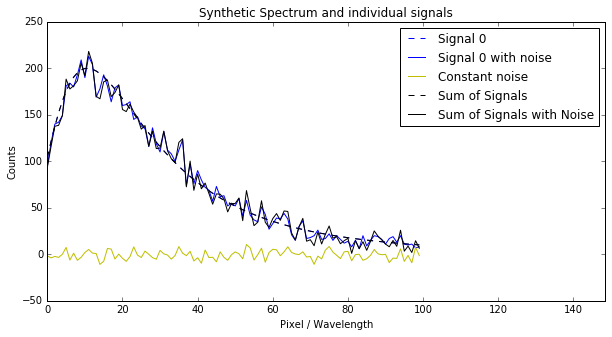

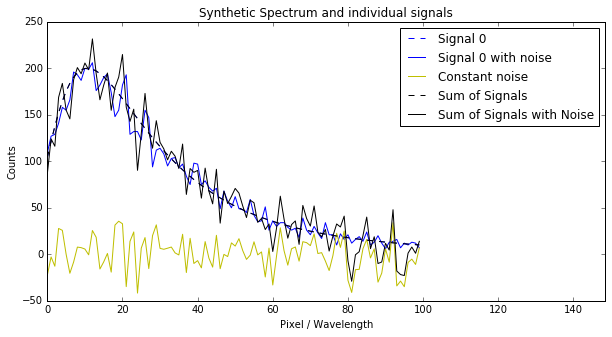

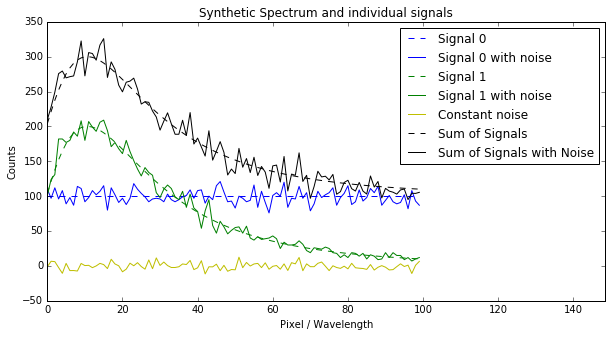

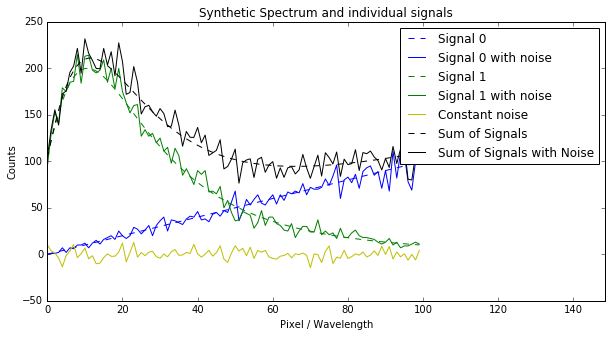

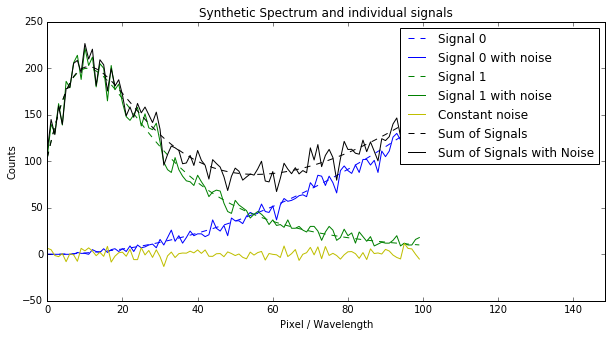

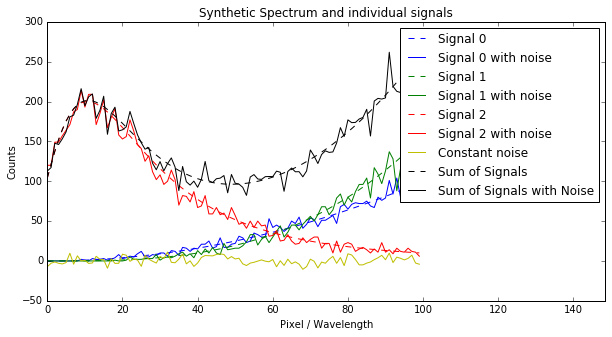

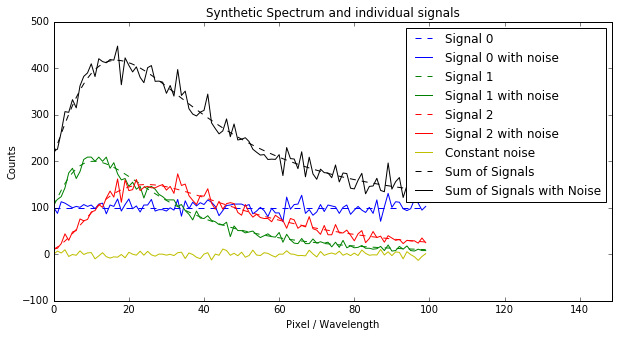

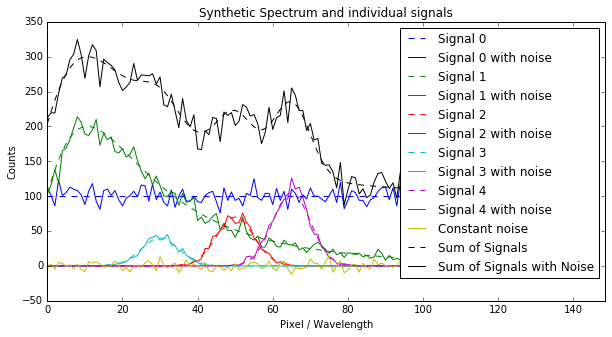

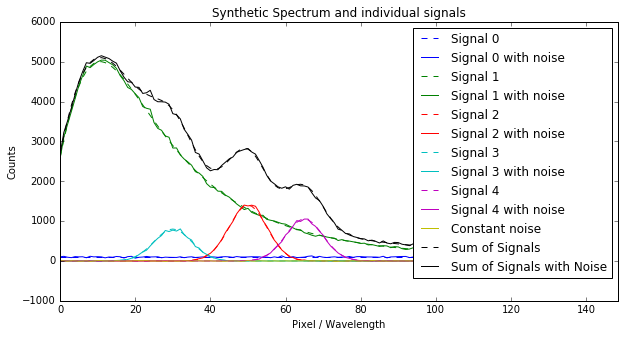

In [12]:
################### Setup ###################
elements = 100

# Blackbody Spectrum as a template for a signal
from astropy import units as u
from astropy.analytic_functions import blackbody_lambda, blackbody_nu
wavelengths = np.linspace(3000, 20000, elements) * u.AA
temperature = 6000 * u.K
flux_lam = blackbody_lambda(wavelengths, temperature).value
flux_lam /= np.max(flux_lam)

temperature2 = 4000 * u.K
flux_lam2 = blackbody_lambda(wavelengths, temperature2).value
flux_lam2 /= np.max(flux_lam2)

# Gaussian emission line (night-line)
from astropy.modeling.models import Gaussian1D
gaussian = Gaussian1D(amplitude=70, mean=50, stddev=5)
gaussian = gaussian(np.arange(elements))

gaussian2 = Gaussian1D(amplitude=40, mean=30, stddev=5)
gaussian2 = gaussian2(np.arange(elements))

gaussian3 = Gaussian1D(amplitude=105, mean=65, stddev=5)
gaussian3 = gaussian3(np.arange(elements))

# Gaussian absorption line (object)
from astropy.modeling.models import GaussianAbsorption1D
gaussian_absorption = GaussianAbsorption1D(amplitude=20, mean=300, stddev=5)
gaussian_absorption = gaussian_absorption(np.arange(elements))

################### Create synthetic spectrum ###################

# This is the placeholder for creating a synthetic spectrum with commonly used signals

# Create spectrum
signals = []

# Add signals to spectrum
#signals.append(np.ones(elements)*100)              # Constant signal
#signals.append((np.arange(elements)))              # Linear increasing signal
#signals.append(np.arange(elements)**2/70)          # Quadratic increasing signal
#signals.append(np.arange(elements)**3/60**2)       # Cubic increasing signal
#signals.append(gaussian)                           # Emission line signal
#signals.append(flux_lam*2/1e4-gaussian_absorption) # gaussian_abs) # Blackbody signal with absorption
#signals.append(flux_lam*200)                       # Blackbody signal

# Make spectrum and plot
#spectrum = SynSpec(signals, wavelengths=None, shotnoise=True, constnoise=5)
#spectrum.plot()

################### Spectrum 1 (Blackbody with RON) ###################

# Create spectrum
signals = []

# Add signals to spectrum
signals.append(flux_lam*200) # Blackbody signal

# Make spectrum and plot
spectrum = SynSpectrum(signals, wavelengths=None, shotnoise=True, constnoise=5)
spectrum.plot()

################### Spectrum 2 (Blackbody with more RON) ###################

# Create spectrum
signals = []

# Add signals to spectrum
signals.append(flux_lam*200) # Blackbody signal

# Make spectrum and plot
spectrum = SynSpectrum(signals, wavelengths=None, shotnoise=True, constnoise=20)
spectrum.plot()

################### Spectrum 3 (Blackbody with constant and RON) ###################

# Create spectrum
signals = []

# Add signals to spectrum
signals.append(np.ones(elements)*100) # Constant signal
signals.append(flux_lam*200)          # Blackbody signal

# Make spectrum and plot
spectrum = SynSpectrum(signals, wavelengths=None, shotnoise=True, constnoise=5)
spectrum.plot()

################### Spectrum 4 (Blackbody with linear and RON) ###################

# Create spectrum
signals = []

# Add signals to spectrum
signals.append(np.arange(elements)) # Linear signal
signals.append(flux_lam*200)        # Blackbody signal

# Make spectrum and plot
spectrum = SynSpectrum(signals, wavelengths=None, shotnoise=True, constnoise=5)
spectrum.plot()

################### Spectrum 5 (Blackbody with quadratic and RON) ###################

# Create spectrum
signals = []

# Add signals to spectrum
signals.append(np.arange(elements)**2/70) # Quadratic signal
signals.append(flux_lam*200)              # Blackbody signal

# Make spectrum and plot
spectrum = SynSpectrum(signals, wavelengths=None, shotnoise=True, constnoise=5)
spectrum.plot()

################### Spectrum 6 (Blackbody with quadratic and RON) ###################

# Create spectrum
signals = []

# Add signals to spectrum
signals.append(np.arange(elements)**2/100)   # Quadratic signal
signals.append(np.arange(elements)**3/80**2) # Cubic signal
signals.append(flux_lam*200)                 # Blackbody signal

# Make spectrum and plot
spectrum = SynSpectrum(signals, wavelengths=None, shotnoise=True, constnoise=5)
spectrum.plot()

################### Spectrum 7 (2 different Blackbody with constant and RON) ###################

# Create spectrum
signals = []

# Add signals to spectrum
signals.append(np.ones(elements)*100) # Constant signal
signals.append(flux_lam*200)          # Blackbody signal 1
signals.append(flux_lam2*150)         # Blackbody signal 2

# Make spectrum and plot
spectrum = SynSpectrum(signals, wavelengths=None, shotnoise=True, constnoise=5)
spectrum.plot()

################### Spectrum 8 (Blackbody with gaussian emission line and RON) ###################

# Create spectrum
signals = []

# Add signals to spectrum
signals.append(np.ones(elements)*100) # Constant signal
signals.append(flux_lam*200)          # Blackbody signal 1
signals.append(gaussian)              # Gaussian emission line
signals.append(gaussian2)             # Gaussian emission line
signals.append(gaussian3)             # Gaussian emission line

# Make spectrum and plot
spectrum = SynSpectrum(signals, wavelengths=None, shotnoise=True, constnoise=5)
spectrum.plot()

################### Spectrum 9 (Blackbody with gaussian emission line and RON) ###################

# Create spectrum
signals = []

# Add signals to spectrum
signals.append(np.ones(elements)*100) # Constant signal
signals.append(flux_lam*5000)         # Blackbody signal 1
signals.append(gaussian*20)          # Gaussian emission line
signals.append(gaussian2*20)         # Gaussian emission line
signals.append(gaussian3*10)         # Gaussian emission line

# Make spectrum and plot
spectrum = SynSpectrum(signals, wavelengths=None, shotnoise=True, constnoise=5)
spectrum.plot()